# SD4DS Exercise 1  
## Accessing CWRU HPC and Running a System Dynamics Model in Jupyter

### Learning Objectives

By completing this exercise, students will be able to:

- Access the CWRU High Performance Computing (HPC) cluster using Open OnDemand
- Launch an interactive JupyterLab session
- Execute code on remote HPC resources
- Implement a simple System Dynamics model in Python
- Visualize simulation outputs
- Understand how HPC infrastructure supports scalable SD experimentation

This exercise serves as the foundation for subsequent SD4DS modules involving policy analysis and strategy exploration.

In [1]:
import sys
import platform

print("Python version:", sys.version)
print("Platform:", platform.platform())

Python version: 3.10.12 (main, Nov  4 2025, 08:48:33) [GCC 11.4.0]
Platform: Linux-4.18.0-553.el8_10.x86_64-x86_64-with-glibc2.35


In [4]:
!pip install numpy scipy matplotlib


[notice] A new release of pip is available: 23.3.2 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


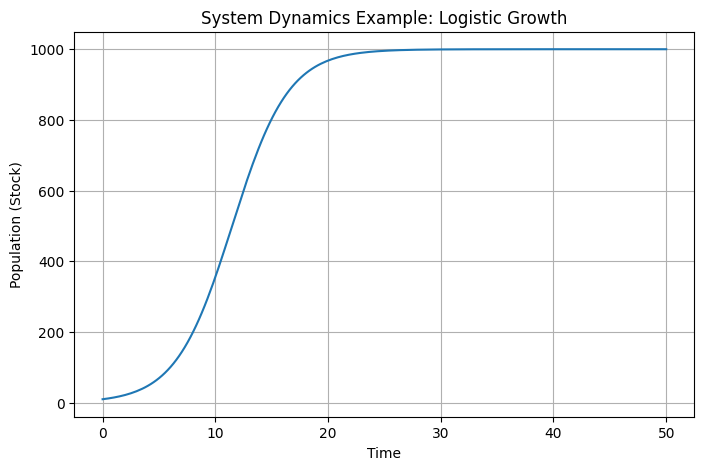

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Logistic growth model (classic SD stock-flow example)
def logistic(x, t, r, K):
    return r * x * (1 - x / K)

# Parameters
r = 0.4        # growth rate
K = 1000      # carrying capacity
x0 = 10       # initial population

# Time horizon
t = np.linspace(0, 50, 200)

# Run simulation
solution = odeint(logistic, x0, t, args=(r, K))
population = solution[:, 0]

# Plot
plt.figure(figsize=(8,5))
plt.plot(t, population)
plt.title("System Dynamics Example: Logistic Growth")
plt.xlabel("Time")
plt.ylabel("Population (Stock)")
plt.grid(True)
plt.show()

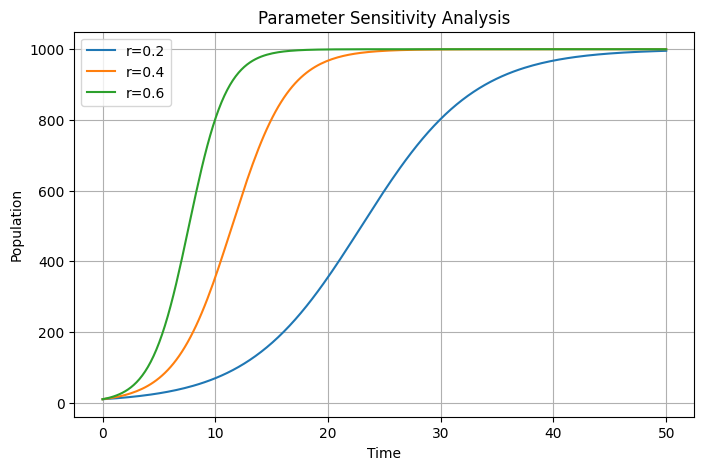

In [9]:
# Parameter sensitivity analysis (multiple growth rates)
rates = [0.2, 0.4, 0.6]

plt.figure(figsize=(8,5))

for r in rates:
    sol = odeint(logistic, x0, t, args=(r, K))
    plt.plot(t, sol[:,0], label=f"r={r}")

plt.title("Parameter Sensitivity Analysis")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.show()

## Reflection

1. How does running this model on HPC differ from running it locally?
2. Why is reproducibility important for System Dynamics experiments?
3. How could this workflow be extended to explore multiple parameter settings?
4. How might HPC enable large-scale policy analysis in SD models?